In [22]:
import pandas as pd 

df = pd.read_csv('/Users/kalebmckenzie/Documents/GitHub/Project 2/DP_LIVE_19122020174109178.csv')
df['LOCATION'].unique()
df_can = df.loc[df['LOCATION'] == 'CAN'].reset_index(drop=True)
df_can = df_can.drop(['Flag Codes', 'SUBJECT', 'INDICATOR', 'FREQUENCY', 'MEASURE'], axis=1)
#H1n1 april 2009 - aug 2009
#SARS march 2003 
#MERS sept 2012
#ebola march 2014 - july 2015
#covid19 march 2020 - 


In [37]:
import datetime as dt
#Unemployment SARS

df_sars = df_can[(df_can['TIME'] >= '2003-03') & (df_can['TIME'] <= '2003-11')].reset_index(drop=True)

In [38]:
# Unemployment H1N1
df_h1n1 = df_can[(df_can['TIME'] >= '2009-04') & (df_can['TIME'] <= '2009-12')].reset_index(drop=True)

df_mers = df_can[(df_can['TIME'] >= '2012-09') & (df_can['TIME'] <= '2013-05')].reset_index(drop=True)

df_ebol = df_can[(df_can['TIME'] >= '2014-03') & (df_can['TIME'] <= '2014-11')].reset_index(drop=True)

df_cov = df_can[(df_can['TIME'] >= '2020-03') & (df_can['TIME'] <= '2020-11')].reset_index(drop=True)

In [55]:
sars = 'SARS'
mers = 'MERS'
h1n1 = 'H1N1'
ebol = 'EBOLA'
cov = 'COVID-19'

df_sars['disease'] = sars
df_h1n1['disease'] = h1n1
df_mers['disease'] = mers
df_cov['disease'] = cov
df_ebol['disease'] = ebol

In [63]:
disease_merge = (df_sars.merge(df_h1n1,how='outer')
  .merge(df_mers,how='outer')
  .merge(df_ebol,how='outer')
  .merge(df_cov, how='outer'))

In [71]:
disease_merge['TIME'] = disease_merge['TIME'].astype(str)
disease_merge[['year','month']] = disease_merge['TIME'].str.split('-', expand=True)


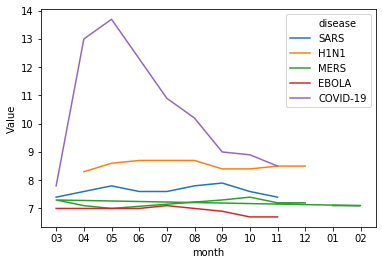

In [73]:
import seaborn as sns
sns.lineplot(x='month', y='Value', hue='disease', data=disease_merge)

In [15]:
df_us = df.loc[df['LOCATION'] == 'USA'].reset_index(drop=True)
df_us = df_us.drop(['Flag Codes', 'SUBJECT', 'INDICATOR', 'FREQUENCY', 'MEASURE'], axis=1)


,LOCATION,TIME,Value
0,USA,2002-11,5.9
1,USA,2002-12,6.0
2,USA,2003-01,5.8
3,USA,2003-02,5.9
4,USA,2003-03,5.9
...,...,...,...
212,USA,2020-07,10.2
213,USA,2020-08,8.4
214,USA,2020-09,7.9
215,USA,2020-10,6.9
